In [1]:
#Let's import all the libraries required
#You may want to install the libraries if you haven't already (Example): pip install pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

In [109]:
df = pd.read_csv(r'C:\Users\shwa6375\Downloads\train.csv') #import data file called train

In [3]:
#Feature engineering is the process of selecting and transforming variables when 
#creating a predictive model using machine learning or statistical modeling.

#Feature engineering 1: SibSp & Parch
#Below we are creating a new column by adding two cols called Sibsp and Parch (and adding yourself)
#Familysize implies how many people you have in home. Thus, we need to add everyone.
#Familysize may impact survival. Thus, we are creating this new col
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [130]:
#Feature engineering 2: Embarked
#From EDA we konw that Embarked col has two missing values.
#Run df.isnull().sum() to see which col has how many missing values
#The argument subset below indicates that the code will drop rows with NaN (Not a number) values 
#in Embarked column only. It's just two of them - so let's drop those rows.
df = df.dropna(subset=['Embarked'])

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [13]:
#if we take the unique values of this column called embarked, we will find that it has 3 values, 
#namely C, Q and S (which stands for Cherbourg, Queenstown and Southampton). Here I decided to
#convert this column values into something like one-hot representation since many machine learning 
#algorithm will never work with non-numerical data. To do that, we can use get_dummies() function
#coming with Pandas module.

embarked_one_hot = pd.get_dummies(df['Embarked'], prefix='Embarkedy')
embarked_one_hot #this line allows to print the variable we created
#we are changing Embarked to 0, 0, 1 (or it's variety)
#prefix will add the word Embarkedy on the name of the three cols being created
#if you run above code without prefix, the col name will just have C, Q, S

#the output we created above has to be merged with our table called df
#line below will allow to concatenate our dummies values with existing table called DF
#axis=1 (or axis = 'columns') tell us we want to concatenate the data column-wise
#axis is defined in this website: https://tinyurl.com/v4mazmmm
df = pd.concat([df, embarked_one_hot], axis=1) 
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarkedy_S,Embarkedy_C,Embarkedy_Q,Embarkedy_S,Embarkedy_C,Embarkedy_Q,Embarkedy_S,Embarkedy_C,Embarkedy_Q,Embarkedy_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,0,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,0,0,1,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,1,0,0,1,0,0,1,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,0,1,0,0,1,0,0,1


In [14]:
#Feature engineering 3: Cabin

#from our EDA we see several hundreds of missing values for Cabin. 
#We will add a value called U on missing data (for no reason). 
#we probably won't use this col.
#fillna allows us to fill the missing value with U
df['Cabin'] = df['Cabin'].fillna('U')

In [16]:
#Feature engineering 5: Sex

#Just what we did with embarked, we do the same thing here
sex_one_hot = pd.get_dummies(df['Sex'], prefix='Sex')
df = pd.concat([df, sex_one_hot], axis=1)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Embarkedy_C,Embarkedy_Q,Embarkedy_S,Embarkedy_C,Embarkedy_Q,Embarkedy_S,Sex_female,Sex_male,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0,0,1,0,0,1,0,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,1,0,0,1,0,0,1,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,0,0,1,0,0,1,1,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,0,1,0,0,1,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,0,0,1,0,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,0,1,0,0,1,0,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,0,1,0,0,1,1,0,1,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,...,0,0,1,0,0,1,1,0,1,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,1,0,0,1,0,0,0,1,0,1


In [17]:
#Feature engineering 6: Age
#We have so many missing data on Age (around 177). How do we repalce them?
#Let's find median age for each pclass for people.

age_median = df.groupby('Pclass')['Age'].median()
age_median

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [23]:
#Next, we need to create a function fill_age() which accepts a single value as its parameter. 
#This x parameter basically just represents every row in our data frame.
#below, we say that if pclass matches that of index col, then give age.
def fill_age(x):
    for index, age in zip(age_median.index, age_median.values):
        if x['Pclass'] == index:
            return age

In [25]:
#Now it’s time to apply this fill_age() function. However though, we need to be careful 
#since essentially what we need to do is to replace only the missing Age, not the entire 
#values in Age column. Therefore, I define a lambda function inside of apply() method. 
#What’s actually done by the lambda function itself is that we are going to apply the fill_age() 
#function only when the corresponding age is missing. Otherwise, if the age value already exists, 
#then we will just use its existing value. Below is how to do it:
df['Age'] = df.apply(lambda x: fill_age(x) if np.isnan(x['Age']) else x['Age'], axis=1)

In [26]:
df.isnull().sum() #finds missing values from all cols

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
FamilySize     0
Embarked_C     0
Embarked_Q     0
Embarked_S     0
Embarkedy_C    0
Embarkedy_Q    0
Embarkedy_S    0
Embarkedy_C    0
Embarkedy_Q    0
Embarkedy_S    0
Embarkedy_C    0
Embarkedy_Q    0
Embarkedy_S    0
Embarkedy_C    0
Embarkedy_Q    0
Embarkedy_S    0
Sex_female     0
Sex_male       0
Sex_female     0
Sex_male       0
dtype: int64

In [28]:
#Now let's check our data types?
#How many are character/object?

df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
FamilySize       int64
Embarked_C       uint8
Embarked_Q       uint8
Embarked_S       uint8
Embarkedy_C      uint8
Embarkedy_Q      uint8
Embarkedy_S      uint8
Embarkedy_C      uint8
Embarkedy_Q      uint8
Embarkedy_S      uint8
Embarkedy_C      uint8
Embarkedy_Q      uint8
Embarkedy_S      uint8
Embarkedy_C      uint8
Embarkedy_Q      uint8
Embarkedy_S      uint8
Sex_female       uint8
Sex_male         uint8
Sex_female       uint8
Sex_male         uint8
dtype: object

In [30]:
#We don't use cols that are object/charater in this model. Let's drop those cols (all of them)
df = df.drop(['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [83]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Embarked_C,Embarked_Q,Embarked_S,...,Embarkedy_C,Embarkedy_Q,Embarkedy_S,Embarkedy_C,Embarkedy_Q,Embarkedy_S,Sex_female,Sex_male,Sex_female,Sex_male
0,0.0,1.0,0.271174,0.125,0.0,0.014151,0.1,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.0,0.139136,0.1,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,0.015469,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.0,0.434531,0.125,0.0,0.103644,0.1,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,0.0,1.0,0.434531,0.000,0.0,0.015713,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


In [31]:
#Now, the very last step in feature engineering part is to normalize all values. In this project 
# I decided to use linear scaling method for simplicity.
#The goal of normalization is to transform features to be on a similar scale. This improves 
#the performance and training stability of the model.

df = (df-df.min())/(df.max()-df.min())

In [86]:
#Machine learning: logistic regression
#Now, to create Logistic reg, we need to define our x and y. 
#x is dependent variable. y is independent variable

x=df[['Pclass','Age','SibSp','Parch','Fare','Sex_female']]
y=df['Survived']

#Let's assume we want to include all the IVs in our. 
#Then we can write the following two lines of codes instead of above

#y = df['Survived'].values
#X = df.iloc[:,1:].values   #all rows, col one to all cols


In [107]:
#We need to install and import modules just in case

#pip install sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [131]:
#Again, there’s another thing that we need to do: separating the data into train/test, 
#which can simply be done using train_test_split() function coming from Sklearn module. 
#In this case, I decided to use 20% of the data as the test set.
#Random state ensures that the splits that you generate are reproducible. 
#You can put any number for random_state but the number should be the same next time your run the code

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=21, test_size=0.2)

#tells what random state mean by:https://tinyurl.com/ynrnfjpt

In [132]:
#Now as we already got both train and test data, we can start to define a logistic regression model. 
#The reason why I choose this classifier model is because we are dealing with categorical target 
#(either true or false). Linear regression is obviously not going to work in this case since it can 
#only predict continuous values. But why not the others like decision tree, random forest, SVM, or 
#others? Simply because I found that the final accuracy of those algorithms are just worse 
#than what I obtain using logistic regression.

# What we need to do is to initialize a LogisticRegression() object, which I put in clf variable.

clf = LogisticRegression()

In [44]:
#As the classifier has been initialized, we can start to train the model using our X_train and 
#y_train pair. It can simply be done using fit() method. 

clf.fit(X_train, y_train)

LogisticRegression()

In [45]:
#Now after the clf model has been trained well, we can try to print out the accuracy score like this:
#Keep in mind that we already selected our IVs and DV above (that's our model) - below is finding accuracy

print(clf.score(X_train, y_train)) #for training dataset
print(clf.score(X_test, y_test))    #for test dataset

#Output will show 79.18 and 80.8 implying accurancy of 79.18% on train and  80.8% accuracy on 
# test data, if the same model is applied to it (to predict). 
#According to this result, we can say that this logistic regression classifier is not overfitting, 
#even though the accuracy itself might still able to be improved using some other techniques.

0.7918424753867792
0.8089887640449438


In [ ]:
#What we did above can be done the following way to and it gives even more detailed score
#following will be getting accuracy prediction report we received above in more detail

from sklearn.metrics import classification_report 


In [79]:
print(classification_report(y_train,train_preds))

print(classification_report(y_test,test_preds))

              precision    recall  f1-score   support

         0.0       0.81      0.84      0.83       423
         1.0       0.76      0.72      0.74       288

    accuracy                           0.79       711
   macro avg       0.79      0.78      0.78       711
weighted avg       0.79      0.79      0.79       711



In [ ]:
#Model evaluation

#In the model evaluation chapter, we want to see how good is our accuracy score (we calcualted above)
#A confusion matrix is a table that is used to define the performance of a classification algorithm.
#Here I would like to display 2 confusion matrices in which the first one is going to 
#display train data predictions and the next one is used to show the test data predictions.
#To do that, we need to predict our train data itself and store the predictions in train_preds variable.
#Let's first do it for train dataset. 
#We will call it train_peds. It's the predicted y value in some way based on X_test

train_preds = clf.predict(X_train)

In [54]:
#Next, I can simply use confusion_matrix() function to construct a confusion matrix. 
#Remember that the first argument should be the actual values and 
#then followed by the predictions in the next one.
#y_train is actual value for y. train_peds is predicted y value (see code above)
cm = confusion_matrix(y_train, train_preds)

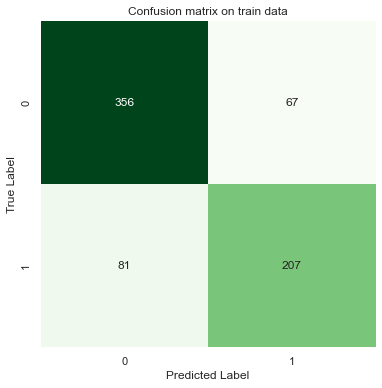

In [139]:
#As the cm array has been created, now we can use its value to be displayed 
#using heatmap() function coming from Seaborn module.

plt.figure(figsize=(6,6))
plt.title('Confusion matrix on train data')
sns.heatmap(cm, annot=True, fmt='d', cmap=plt.cm.Greens, cbar=False)
#The annot only help to add numeric value on python heatmap cell but fmt parameter allows to 
#add string (text) values on the cell. d implies decimal integer.
#cmap stands for colormap; cbar implies colorbar
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
#What we actually see in the figure above is how the data is predicted. 
#For example, here we got 67 survived passengers which are predicted as not survived. 
#Also , we found here that there are 81 not survived passengers yet predicted as survived.

In [50]:
#We are redoing what we did above but now for TEST dataset.

test_preds = clf.predict(X_test)

In [51]:
#redoing the same thing as Train data but now for Test data

cmtest = confusion_matrix(y_test, test_preds)

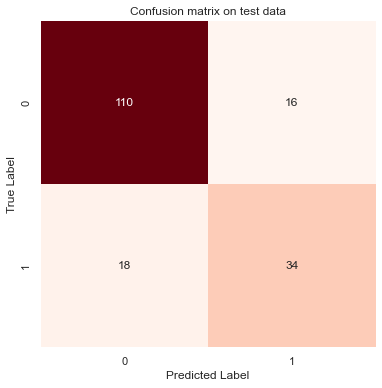

In [142]:
#redoing the same as we did in Train dataset
plt.figure(figsize=(6,6))
plt.title('Confusion matrix on test data')
sns.heatmap(cmtest, annot=True, fmt='d', cmap=plt.cm.Reds, cbar=False) 
#The annot only help to add numeric value on python heatmap cell but fmt parameter allows to 
#add string (text) values on the cell. d implies decimal integer.
#cmap stands for colormap; cbar implies colorbar
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [123]:
#what if we want to see p-values of our IVS on DV for logit? We do the following.
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [124]:
#what if we want to see p-values of our IVS on DV for logit? We do the following.
import statsmodels.api as sm

In [126]:
#Survived is our Dependent Variable. Age and Fare are IVs.
#Because survived is 0,1, it's binary/binomial category. 
#For predicting a categorical outcome (such as y = true/false) it is often advised to use a 
#form of GLM called a logistic regression instead of a standard linear regression. See below

model = sm.GLM.from_formula("Survived ~ Age + Fare", family=sm.families.Binomial(), data=df)
result = model.fit()
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      711
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -445.67
Date:                Sun, 10 Apr 2022   Deviance:                       891.34
Time:                        20:20:59   Pearson chi2:                     785.
No. Iterations:                     5   Pseudo R-squ. (CS):            0.09741
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4171      0.186     -2.243      0.025      -0.782      -0.053
Age           -0.0176      0.006     -3.103      0.002      -0.029      -0.006
Fare           0.0173      0.003      6.596      0.000       0.012       0.022
==============================================================================
"""

In [ ]:
#From our data output above, we see at p-value (given in P>z). 
#Both Age and fare have p-value less than 0.05. Thus, the impact of both Age and Fare on Survived 
#is significant. 
#Coeff for Age is -0.0176. It imples that the log odds for our DV called Survived decreases by 
#0.0176 for each unit of 'Age'. Also, coeff for Fare is 0.0173. This implies that the log odds
#for our DV called Survived increases by 0.0173 for each unit of "Fare".

In [121]:
#There are several other models that are alternative to Logistic Regression.
#One of them is Decision tree method. Let's try it to see if this gives more accuracy.

from sklearn import tree #running a new model accuracy called Decision Tree Method

In [117]:
model2 = tree.DecisionTreeClassifier(criterion ='entropy', random_state=42)

In [98]:
model2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [99]:
print(model2.score(X_train, y_train))



0.9845288326300985


In [143]:
#we can do the same thing for test model and see our accuracy for decision tree method
model3 = tree.DecisionTreeClassifier(criterion ='entropy', random_state=42)
model3.fit(X_test, y_test)
print(model3.score(X_test, y_test))

0.9943820224719101


In [148]:
#Another altenrative to Logistics is K Nearest Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier

In [155]:
model4 = KNeighborsClassifier(n_neighbors=5) # by default neighbors value is 5
model4.fit(X_train, y_train)
print(model4.score(X_train, y_train))


0.8466947960618847


In [127]:
#Linear Regression.

#This line of code is not related to Logistic regression or it's altenrative. 
#This is completely diffrent. We are moving to a separate types of regression called linear
#We want to see how to run a linear regression in Python 
#For linear regression we need DV to be a numeric variable such as Fare or Income 
#already installed library required for this above import statsmodels.api as sm
model_lin = sm.OLS.from_formula("Fare ~ Age", data=df)
result_lin = model_lin.fit()
result_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Fare   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     6.632
Date:                Sun, 10 Apr 2022   Prob (F-statistic):             0.0102
Time:                        20:59:38   Log-Likelihood:                -3843.0
No. Observations:                 714   AIC:                             7690.
Df Residuals:                     712   BIC:                             7699.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.3009      4.492      5.410      0.000      15.481      33.120
Age            0.3500      0.136      2.575      0.010       0.083       0.617
==============================================================================
Omnibus:                      716.815   Durbin-Watson:                   1.925
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30883.661
Skew:                           4.654   Prob(JB):                         0.00
Kurtosis:                      33.846   Cond. No.                         75.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""